# Overview

This week is about tying everything together. We try to combine our work on networks plus our work on language in order to understand and analyze human behavior. We'll be working on a cool dataset of humans playing a game on (a special version of) wikipedia called "wikispeedia".  Note that the game is now called *The Wiki Game* and can be found at http://thewikigame.com/ (... while "http://wikispeedia.org" is a page about GPS coordinates of speed-traps). 

Here's how the game worked:

> In the game, users are asked to navigate from a given _source_ article (e.g. https://en.wikipedia.org/wiki/Gold_dollar) to a given _target_ article (e.g. https://en.wikipedia.org/wiki/Ronald_Reagan), **by only clicking Wikipedia links**. A condensed version of Wikipedia (4,604 articles) is used. 

So this dataset contains **human navigation paths** (clicking from page to page to find a target) and today we will work on this dataset to see if we can use our skills to understand how human navigation works. We will think about the following questions.

* Path lengths
* Betweenness from the human perspective
* What characterizes human paths?

Since we're putting our existing skills to use, there is very little reading today - it's all about exploring the dataset. Let's get started.

## Download the dataset

The first thing we're going to do is download the dataset. Today everything related to data is nice, clean, and easy to work with (Yay). You can get the dataset [here](https://snap.stanford.edu/data/wikispeedia.html). You will need to get 

* The list of wiki articles
* The network connections
* The navigation paths
* Plaintext of the wiki articles

# Path lengths

The first thing we want to take a look at is path lengths. NetworkX allows us to calculate the shortest path between any pair of articles. We begin by comparing the length of human and shortests paths. 

_Exercises_
> * For each _source_/_target_ pair in the list of human navigation paths, calculate the shortest path using NetworkX. Plot the distribution of path lengths. Mine looks something like this (if I use an undirected graph):
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/shortest-path.png)
Nevertheless, you should still see the difference between human and shortest paths using the directed graph as well, although they might be smaller.

> * For each _source_/_target_ pair, calculate the length of the human path. The dataset contains information on people who regret a navigation step and hit the "back" button in their web-browser. It's up to you how to incorporate that information in the path. Justify your choice. Plot the distribution of human path lengths. If I ignore back steps, I get this on log-log scale:
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/human-path.png)

> * How much longer are the human paths on average?
> * Create scatter plot where each point is a _source_/_target_ pair, and you have human path lengths on the $x$-axis and shortests paths on the $y$-axis.
> * Is there a correlation between human/shortest path-lengths? What is the correlation.

In [336]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from __future__  import division

In [319]:
#C:\Users\helga\Documents\SocialGraphs\wikispeedia_paths-and-graph\wikispeedia_paths-and-graph
G = nx.Graph()
sorce_target = []
human_paths_length = {}
id = 0
with open("/Users/helga/Documents/SocialGraphs/wikispeedia_paths-and-graph/wikispeedia_paths-and-graph/paths_finished.tsv") as f:
    for line in f:
        line = line.split()
        # if we have a blank line or a line that starts with a comment, we dont use it
        if len(line) > 0 and line[0] != "#":
            path = line[3] # this is where the path is in the data file
            nodes = path.split(";")
            if "<" in nodes:
                nodes = [node for node in nodes if node != "<"]
            
            G.add_path(nodes)
            human_paths_length[id] = len(nodes) - 1

            #human_paths_length.append(len(nodes) - 1) # -1 beacuse we are counting the edges
            sorce_target.append((nodes[0], nodes[-1], id))
            id += 1
            


In [320]:
# take the data from the links documet
sorce_target2 = []
G2 = nx.Graph()
with open("/Users/helga/Documents/SocialGraphs/wikispeedia_paths-and-graph/wikispeedia_paths-and-graph/links.tsv") as f:
    for line in f:
        line = line.split()
        # if we have a blank line or a line that starts with a comment, we dont use it
        if len(line) > 0 and line[0] != "#":
            sorce_target2.append((line[0], line[1]))
            G2.add_path(line)
print "done"

done


In [321]:
shortest_paths = {}

for pair in sorce_target:
    try:
        # pair 2 is the id from the human paths
        shortest_paths[pair[2]] = nx.shortest_path_length(G2, source=pair[0], target=pair[1])
    except:
        pass
print "done"


done


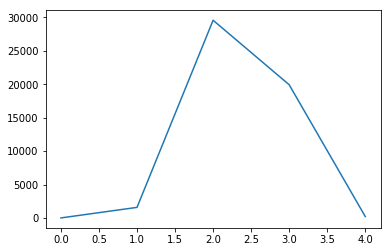

In [322]:
network_path = Counter(shortest_paths.values())
plt.plot(network_path.keys(), network_path.values())
plt.show()

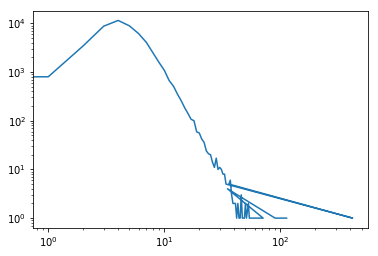

In [323]:
#For each source/target pair, calculate the length of the human path. The dataset contains information on people
#who regret a navigation step and hit the "back" button in their web-browser. It's up to you how to incorporate that
#information in the path. Justify your choice. Plot the distribution of human path lengths. If I ignore back steps, 
#I get this on log-log scale:

human_paths_length_bin = Counter(human_paths_length.values())
plt.plot(human_paths_length_bin.keys(), human_paths_length_bin.values())
plt.yscale("log")
plt.xscale("log")
plt.show()

In [324]:
# Spyrja um backid i tima

print "human path average {}".format(np.mean(human_paths_length.values()))
print "network path average {}".format(np.mean(shortest_paths.values()))
print "The difference human - network is {}".format(np.mean(human_paths_length.values()) - np.mean(shortest_paths.values()))

human path average 5.35677540044
network path average 2.36525907594
The difference human - network is 2.9915163245


In [325]:
# Scatter
print len(human_paths_length)
print len(shortest_paths)


51318
51317


In [326]:
max(human_paths)

419

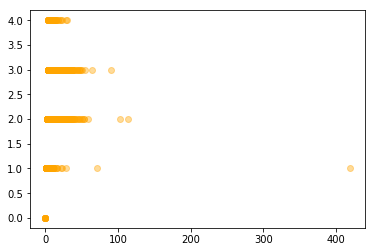

[[ 1.          0.20678837]
 [ 0.20678837  1.        ]]


In [327]:
human_paths = []
best_paths = []
for id in shortest_paths:
    human_paths.append(human_paths_length[id])
    best_paths.append(shortest_paths[id])
    
plt.plot(human_paths, best_paths, 'o', alpha = 0.4, color = 'orange')
plt.show()
print np.corrcoef(human_paths, best_paths)

This shows that the human paths and the best paths are not correlated. If they were to be correlated the correlation would need to be higher than 0.7 as a general rule. However, in our case it is around 0.21. We can see that there is one dum perticapant who takes 419 clicks instead of 1.

# Betweenness

An interesting definition of centrality is _betweenness centrality_ (here's a handy [link to the NetworkX documentation](http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html)). In a traditional setting, this measure calculates all shortest paths in the network and then each node gets a score according to which fraction of all shortest paths pass through that node.


In this part, we will create our own version of centrality, based on the _source_/_target_ pairs in our dataset. We define a nodes's **navigation centrality** as follows. 

> *Navigation centrality* of node $i$ is the fraction of all naviagtion paths that pass through $i$. We exclude the source and target from the count. If a node has not been visited by a search, the navigation centrality of that node is defined to be zero.

In the exercises below, we investigate the relationship between navigation centrality and betweenness centrality.

*Exercises*

> Begin by calculating the betweenness centrality and navigation centrality of all nodes in the wikispedia dataset.
> Note that calculating the betweenness centrality can take quite a long time, so you might start it running in a separate notebook while first estimating it based on the existing human path.
>
> * First, list the 5 pages with highest navigation centrality.
> * Second, list the 5 pages with highest betweenness centrality.
> * Compare the two lists. Explain the differences between the two lists in your own words.
> * Create a scatterplot of betweenness centrality vs. navigation centrality.
> * Let's explore the pages that have navigation centrality equal to zero.
>   * How many pages have zero navigation centrality?
>   * What is the the page with zero navigation centrality and highest betweenness centrality? Can you explain why no human navigated to this page? Can you explain why the page is central in the actual link network? (For example, you can take a look at the degree of the node).
>   * Plot the distribution of betweenness centrality for the pages with zero navigation centrality. My plot on log-log scale:
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/betweenness.png)

> * Now, let's *throw out all pages with zero navigation centrality* and compare navigation- and betweenness centrality for the remaining pages.
>   * What is the correlation between betweenness centrality and navigation centrality?
>   * Comment on the top 5 outliers.

In [334]:
# Navigation centrality of node  ii  is the fraction of all naviagtion paths that pass through  ii .
# We exclude the source and target from the count. If a node has not been visited by a search, the navigation centrality of
# that node is defined to be zero.


# Finna allar leiðir sem fara í gegnum ii og deila með öllum leiðum
navigation_count = {}
path_count = 0
with open("/Users/helga/Documents/SocialGraphs/wikispeedia_paths-and-graph/wikispeedia_paths-and-graph/paths_finished.tsv") as f:
    for line in f:
        line = line.split()
        # if we have a blank line or a line that starts with a comment, we dont use it
        if len(line) > 0 and line[0] != "#":
            path = line[3] # this is where the path is in the data file
            nodes = path.split(";")
            if "<" in nodes:
                nodes = [node for node in nodes if node != "<"]
            # count how many times a node is in the path 'that is navigation'
            for node in nodes:
                if node != source and node != target: 
                    if node in navigation_count:
                        navigation_count[node] += 1
                    else:
                        navigation_count[node] = 1
            path_count += 1

print "dnoe"

14th_century African_slave_trade
dnoe


In [340]:
# divide the navigation count with the path count to get the navigation centrality
for key in navigation_count:
    navigation_count[node] = navigation_count[node] / path_count
navigation = sorted(navigation_count.items(), key=lambda x: x[1],  reverse = True)
print navigation[:5]

[('United_States', 8896), ('Europe', 4362), ('United_Kingdom', 3904), ('England', 3332), ('Earth', 3223)]


In [341]:
# calculate the betweenness

betweenness = nx.betweenness_centrality(G2)
betweenness = sorted(betweenness.items(), key=lambda x: x[1],  reverse = True)
print betweenness[:5]

[('United_States', 0.1252161325379494), ('United_Kingdom', 0.04738683598690359), ('Europe', 0.044657653090970265), ('France', 0.0368094045953468), ('England', 0.03359703151055264)]


 ### Compare the two lists. Explain the differences between the two lists in your own words.
 
 The betweenness calculates how many times a node is in the shortest path, while the navigation calculates how many times users used a given node while going to a certain target. The difference lies in the "shortest path" the user dose not need to take the shorteset path to go to a certain site, and thus dose not need to travel the same nodes. The navigation has a more human persepective where we try to predict in what way we will go fastest towards our goal, while the other one simply calculates it.

4592
4167
4166
4166


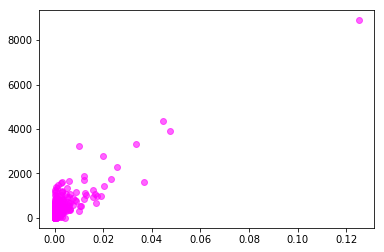

[[ 1.          0.86109373]
 [ 0.86109373  1.        ]]


In [354]:
print len(betweenness)
print len(navigation)
navigation_centrality = dict(navigation)
betweeness_centrality = dict(betweenness)
nav = []
bet = []
for key in navigation_centrality:
    try:
        bet.append(betweeness_centrality[key])
        nav.append(navigation_centrality[key])
    except:
        pass
print len(nav)
print len(bet)
plt.plot(bet, nav, 'o', color = 'magenta', alpha = 0.6)
plt.show()

print np.corrcoef(bet, nav)

In [408]:
# If a node has not been visited by a search, the navigation centrality of that node is defined to be zero.
nav_zero = set(betweeness_centrality.keys()).difference(navigation_centrality.keys())
nav_zero1 = set(navigation_centrality.keys()).difference(betweeness_centrality.keys())
print len(nav_zero)


426
1


In [398]:
# What is the the page with zero navigation centrality and highest betweenness centrality?
nav_zero_between = {}

for node in nav_zero:
    nav_zero_between[node] = betweeness_centrality[node]
maximum = max(nav_zero_between, key=nav_zero_between.get)
print maximum, nav_zero_between[maximum]


List_of_lakes 0.000914289577361


In [406]:
# hér þarf maður örruglega að bina þetta sjálfur.. skoða þetta aððeins betur, hér meikar ekki mikið sens að nota
# counterinn vegna þess að þá er maður bara að telja hversu offt hvert gildi kemur fyrir
nav_zero_val,nav_zero_bins = np.histogram(nav_zero_between.values(),bins = 32)
print len(nav_zero)
print len(nav_zero_between)

426
426


391


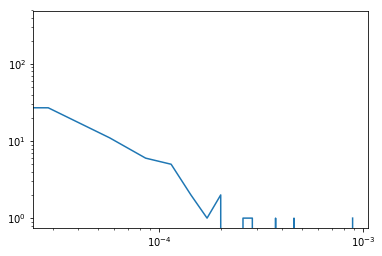

In [407]:

nav_zero_dist = Counter(nav_zero_between.values()) # þetta kom skrýngilega ´´ut
#print nav_zero_dist
print len(nav_zero_dist)
plt.plot(nav_zero_bins[:-1], nav_zero_val)
plt.xscale('log')
plt.yscale('log')
plt.show()

##### Can you explain why no human navigated to this page? Can you explain why the page is central in the actual link network? (For example, you can take a look at the degree of the node).

Já þetta er spruning

# Bringing the text into the picture

Now that we have an idea about the differences between how humans and computers search in networks, we are going to dig a little deeper using the page content to test a hypothesis to explain why the human navigation paths are longer. The general idea is that humans (who don't know about the global network structure) tend to jump between pages that have related _content_. For this reason we expect that (on average) human navigation paths have more similar content than the shortest paths in the network (which might take 'surprising' shortcuts via relatively unrelated pages). In short.

> **Hypothesis H1**: Human navigation paths have more similar content than network shortest paths.

The way we'll test this hypothesis is to first represent each page as a vector using a bag-of-words approach, then we can calculate a distance between pairs of pages using some vector-space difference, and finally we'll characterize each path by its average pair-wise distance. Below, I've set up that process as an exercise. 

*Exercises*

> First, create a TF-IDF vector for each page. You already know all about TF-IDF from last week's exercise. The main difference is that we now _characterize **each page** by a TF-IDF vector_ and not a group of pages.
> 
> Second, write a function that calculates the distance between a pair of vectors. There are many ways to calculate distances between a pair of vectors (try a Google search for `vector space distance measures` if you want to refresh your knowledge on this topic). You're free to choose what you want, but we recommend the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).
>
> Now you're ready for the exercises
> 
> * Calculate the average similarity for all human navigation paths (the _source_/_target_ pairs from above). Calculate mean/variance of these average similarities.
> * Calculate the average similarity for all shortest paths between the _source_/_target_ pairs. Calculate mean/variance of these average similarities.
> * Plot the distributions of average similarities for both human- and shortest paths in a single plot. If everything works well, you should see something similar to the following:
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/path-similarity.png)

> * Finally, for each source/target pair, compare the human-navigation average similarity with the betweenness based average similarity, testing what fraction of the time, the average similarity is lower in the case of human navigation.
> * Comment on your findings. Is **H1** true?